In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import datasets, transforms

In [2]:
import os

In [9]:
data_path = os.getcwd()

In [10]:
data_path

'C:\\Users\\An_asus\\Desktop\\Programming\\JupyterNotebook\\pytorch\\data'

In [17]:
train_data = datasets.CIFAR10(root = data_path, download=True, train=True, transform=transforms.Compose(
                                                                                        [transforms.ToTensor(),
                                                                                        ]
))
test_data = datasets.CIFAR10(root = data_path, download =True, train=False, transform=transforms.Compose(
                                                                                        [transforms.ToTensor(),
                                                                                        ]))

Files already downloaded and verified
Files already downloaded and verified


In [12]:
from torch.utils.data import DataLoader

In [87]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=True)

In [67]:
class NoiseGen(nn.Module):
    def __init__(self, noise_channel, conv_channel):
        super(NoiseGen, self).__init__()
        self.Gen = nn.Sequential(self._block(noise_channel, conv_channel, 3, 2, 0),
                                 self._block(conv_channel, int(conv_channel/2), 3, 2, 0),
                                 self._block(int(conv_channel/2), int(conv_channel/4), 3, 2, 0),
                                 self._block(int(conv_channel/4), 3, 4, 2, 0))
    
    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(nn.ConvTranspose2d(in_channels, out_channels, int(kernel_size), stride, padding),
                             nn.BatchNorm2d(out_channels),
                             nn.ReLU())
    def forward(self, t):
        return self.Gen(t)

In [88]:
_, _2 = next(iter(train_loader))
_.shape

torch.Size([16, 3, 32, 32])

In [69]:
Gen_test = NoiseGen(128, 32).to('cuda')

In [90]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(Gen_test.parameters(), lr=1e-5)

In [91]:
for epoch in range(5):
    for imgs, labels in train_loader:
        imgs = imgs.to('cuda')
        noise = torch.randn(16, 128, 1, 1).to('cuda')
        
        scores = Gen_test(noise)
        
        loss = criterion(scores, imgs)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

In [92]:
import matplotlib.pyplot as plt

In [99]:
Gen_test.to('cpu')

NoiseGen(
  (Gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(128, 32, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2))
      (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
)

tensor([[0.8324]])


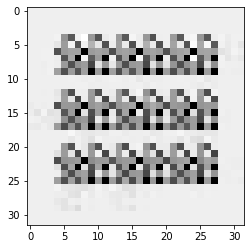

In [110]:
noise = torch.randn(16, 128, 1, 1)
print(noise[0][0])
img_test = Gen_test(noise)[0].mean(0)
plt.imshow(img_test.detach().numpy(), cmap='gray')

In [138]:
torch.tensor(Gen_test.Gen[0][0].weight.detach())

C:\Users\An_asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[[[-0.0602,  0.0431,  0.0597],
          [ 0.0520, -0.0513,  0.0223],
          [-0.0654, -0.0221, -0.0329]],

         [[-0.0013, -0.0056, -0.0010],
          [ 0.0469,  0.0654,  0.0467],
          [-0.0052,  0.0481,  0.0397]],

         [[ 0.0506, -0.0502,  0.0407],
          [ 0.0074, -0.0368,  0.0255],
          [-0.0359, -0.0341, -0.0450]],

         ...,

         [[-0.0390, -0.0365, -0.0008],
          [ 0.0133,  0.0088, -0.0047],
          [-0.0107, -0.0058, -0.0498]],

         [[-0.0363,  0.0251,  0.0466],
          [ 0.0410,  0.0322, -0.0465],
          [ 0.0290, -0.0341, -0.0074]],

         [[-0.0017, -0.0456, -0.0422],
          [ 0.0365, -0.0475, -0.0287],
          [-0.0143,  0.0491, -0.0493]]],


        [[[ 0.0075,  0.0222,  0.0095],
          [ 0.0632,  0.0223,  0.0343],
          [-0.0503,  0.0328,  0.0228]],

         [[ 0.0453,  0.0176,  0.0052],
          [ 0.0328,  0.0442, -0.0492],
          [-0.0449,  0.0329, -0.0064]],

         [[-0.0324, -0.0368, -0